In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.regularizers import l2, l1
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import regularizers
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, UpSampling2D
import matplotlib.pyplot as plt

## Run this first

In [ ]:
!pip install keras==2.7.0 tensorflow==2.7.0 scikit-image

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
_ = tf.keras.datasets.fashion_mnist.load_data()
_ = tf.keras.datasets.cifar10.load_data()
_ = tf.keras.datasets.cifar100.load_data()

#### Different dataset this time

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [118]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

frog


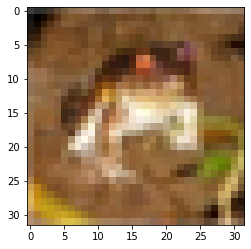

In [121]:
print(classes[y_train[0][0]])
plt.imshow(X_train[0])
plt.show()

### First run model from last meeting

In [74]:
# kernel_regularizer = None
# bias_regularizer = None
kernel_regularizer = regularizers.l2(1e-5)
bias_regularizer = regularizers.l2(1e-5)
input_shape = X_train.shape[1:]

mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = input_shape),
    tf.keras.layers.Dense(128, activation = 'relu',
                          kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer)
])

In [75]:
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [76]:
history = mlp_model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test), 
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=False)])

Epoch 1/100
391/391 [==============================] - 3s 7ms/step - loss: 1.8473 - accuracy: 0.3536 - val_loss: 2.0186 - val_accuracy: 0.3043
Epoch 2/100
391/391 [==============================] - 3s 6ms/step - loss: 1.6647 - accuracy: 0.4103 - val_loss: 2.0392 - val_accuracy: 0.2969
Epoch 3/100
391/391 [==============================] - 2s 6ms/step - loss: 1.5964 - accuracy: 0.4342 - val_loss: 1.5686 - val_accuracy: 0.4494
Epoch 4/100
391/391 [==============================] - 3s 6ms/step - loss: 1.5550 - accuracy: 0.4501 - val_loss: 1.5409 - val_accuracy: 0.4597
Epoch 5/100
391/391 [==============================] - 3s 6ms/step - loss: 1.5276 - accuracy: 0.4588 - val_loss: 1.6611 - val_accuracy: 0.4159
Epoch 6/100
391/391 [==============================] - 3s 6ms/step - loss: 1.5049 - accuracy: 0.4663 - val_loss: 1.5430 - val_accuracy: 0.4541
Epoch 7/100
391/391 [==============================] - 3s 6ms/step - loss: 1.4951 - accuracy: 0.4717 - val_loss: 1.5372 - val_accuracy: 0.4605

In [112]:
input_shape = X_train.shape[1:]
classes_cnt = len(np.unique(y_train))
print(input_shape, X_train.shape, classes_cnt)
cnn_model = Sequential()
cnn_model.add(Conv2D(input_shape=input_shape, filters=4, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(input_shape=input_shape, filters=8, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(classes_cnt, activation='sigmoid'))

(32, 32, 3) (50000, 32, 32, 3) 10


In [113]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [114]:
history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
391/391 [==============================] - 5s 12ms/step - loss: 2.1912 - accuracy: 0.2285 - val_loss: 1.8504 - val_accuracy: 0.3194
Epoch 2/5
391/391 [==============================] - 5s 12ms/step - loss: 1.7408 - accuracy: 0.3652 - val_loss: 1.6190 - val_accuracy: 0.4099
Epoch 3/5
391/391 [==============================] - 5s 12ms/step - loss: 1.5704 - accuracy: 0.4322 - val_loss: 1.5128 - val_accuracy: 0.4572
Epoch 4/5
391/391 [==============================] - 5s 12ms/step - loss: 1.4755 - accuracy: 0.4710 - val_loss: 1.4450 - val_accuracy: 0.4837
Epoch 5/5
391/391 [==============================] - 5s 12ms/step - loss: 1.3987 - accuracy: 0.5012 - val_loss: 1.3986 - val_accuracy: 0.5036


In [115]:
cnn_model.count_params(), mlp_model.count_params()

(16934, 403018)

In [ ]:
input_shape = X_train.shape[1:]
classes_cnt = len(np.unique(y_train))
print(input_shape, X_train.shape, classes_cnt)
cnn_model = Sequential()
cnn_model.add(Conv2D(input_shape=input_shape, filters=32, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(Conv2D(input_shape=input_shape, filters=32, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.1))
cnn_model.add(Conv2D(input_shape=input_shape, filters=32, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(Conv2D(input_shape=input_shape, filters=32, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(classes_cnt, activation='sigmoid'))

(32, 32, 3) (50000, 32, 32, 3) 10


In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

In [101]:
cnn_model.count_params(), mlp_model.count_params()

(68130, 403018)